In [2]:
import pandas as pd
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

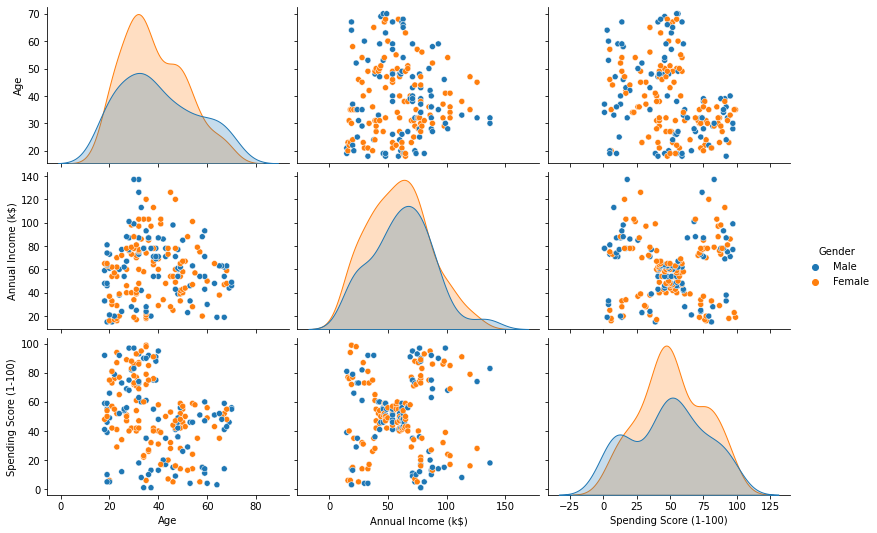

In [4]:
# customer ID와 성별은 고객을 segmenting하는 데 직접적인 연관이 없음을 확인
X = df.drop(['CustomerID', 'Gender'], axis= 1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)

# 1. K-Means

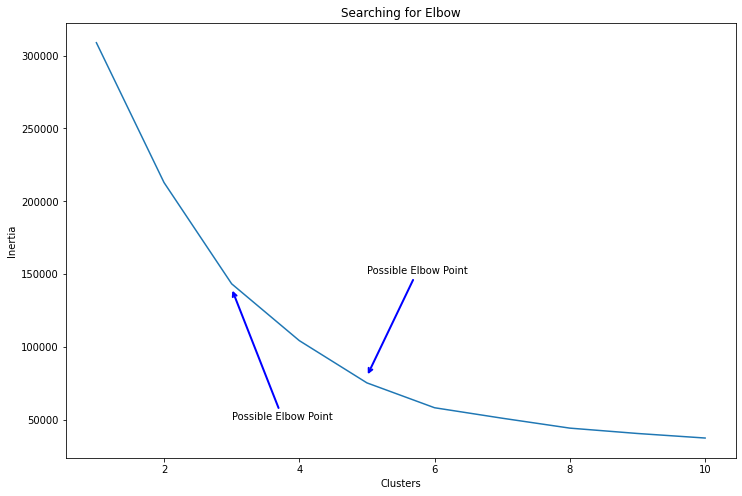

In [7]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11) :
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_) 
    # km.inertia : 샘플의 가장 가까운 중심점에서 거리 제곱의 합. 샘플 가중치가 주어지면 샘플 가중치에 영향 받음

fig, ax = plt.subplots(figsize=(12, 8 ))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()
# elbow graph에 따라 3 or 5개의 군집으로 나누는 것이 적절함을 알 수 있음

In [8]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


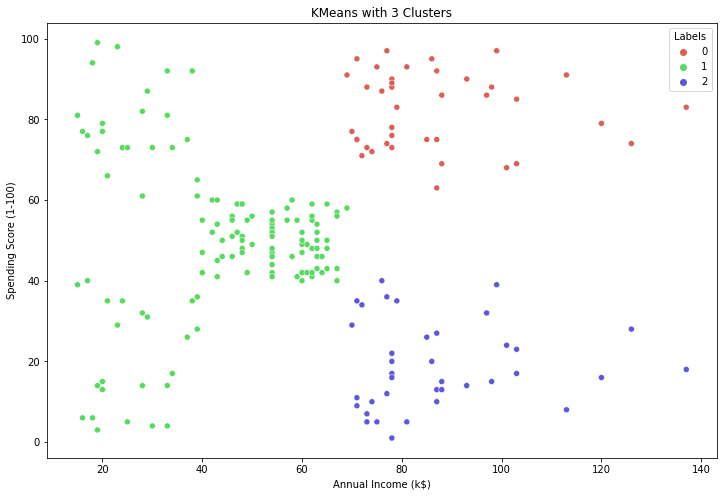

In [9]:
# 3 clusters

km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)',
                 hue='Labels', data=X, palette=sns.color_palette('hls', 3))

plt.title('KMeans with 3 Clusters')
plt.show()

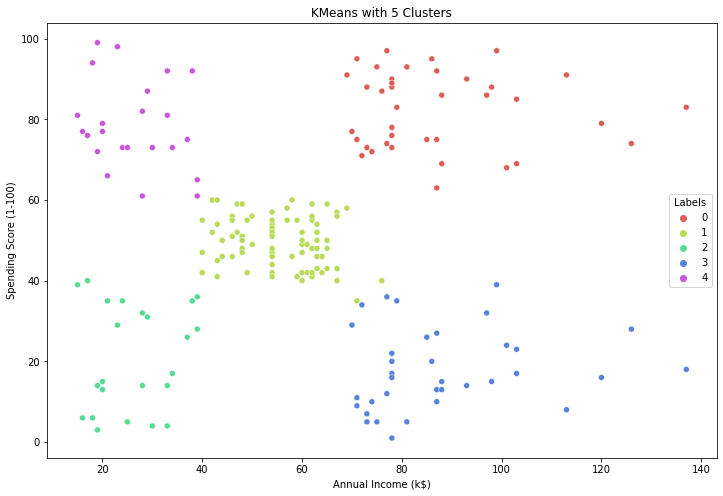

In [11]:
# 4 clusters

km3 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)',
                 hue='Labels', data=X, palette=sns.color_palette('hls', 5))

plt.title('KMeans with 5 Clusters')
plt.show()

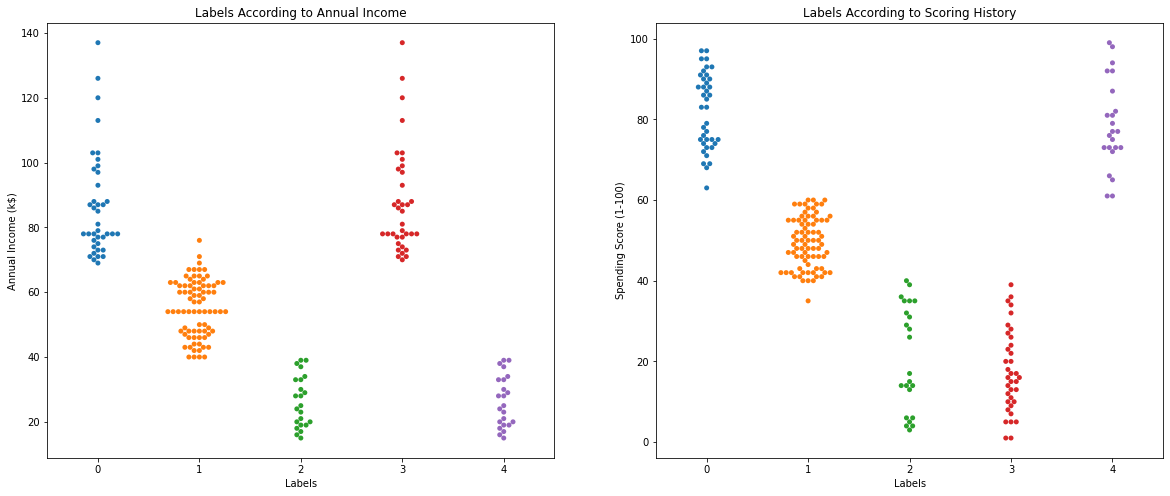

In [13]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income (k$)', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score (1-100)', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

# 2. DBSCAN

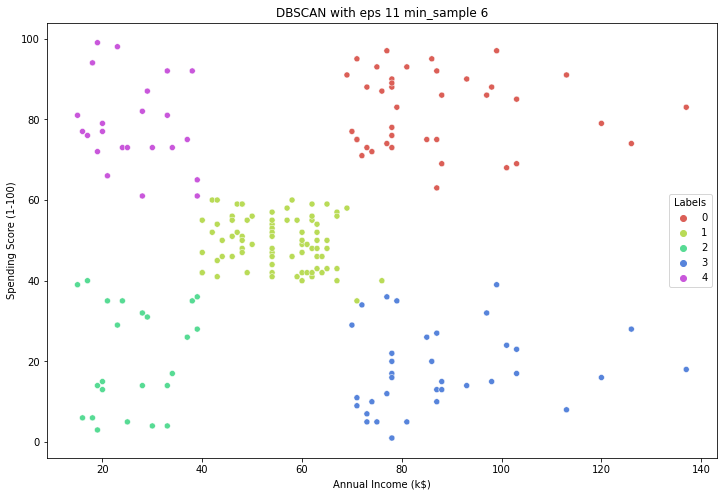

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X.iloc[:,:-1])

X['Lables'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)',
                 hue='Labels', data=X, palette=sns.color_palette('hls', 5))

plt.title('DBSCAN with eps 11 min_sample 6')
plt.show()

# 3. Hierarchical Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

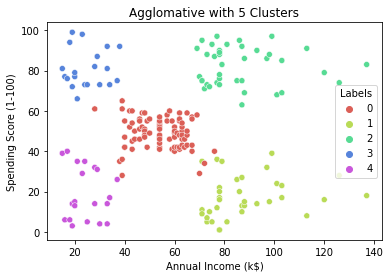

In [20]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X.iloc[:,:-1])
# linkage = {'ward', 'complete', 'average', 'single'}
X['Labels'] = agg.labels_
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)',
                 hue='Labels', data=X, palette=sns.color_palette('hls', 5))
plt.title('Agglomative with 5 Clusters')
plt.show

C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


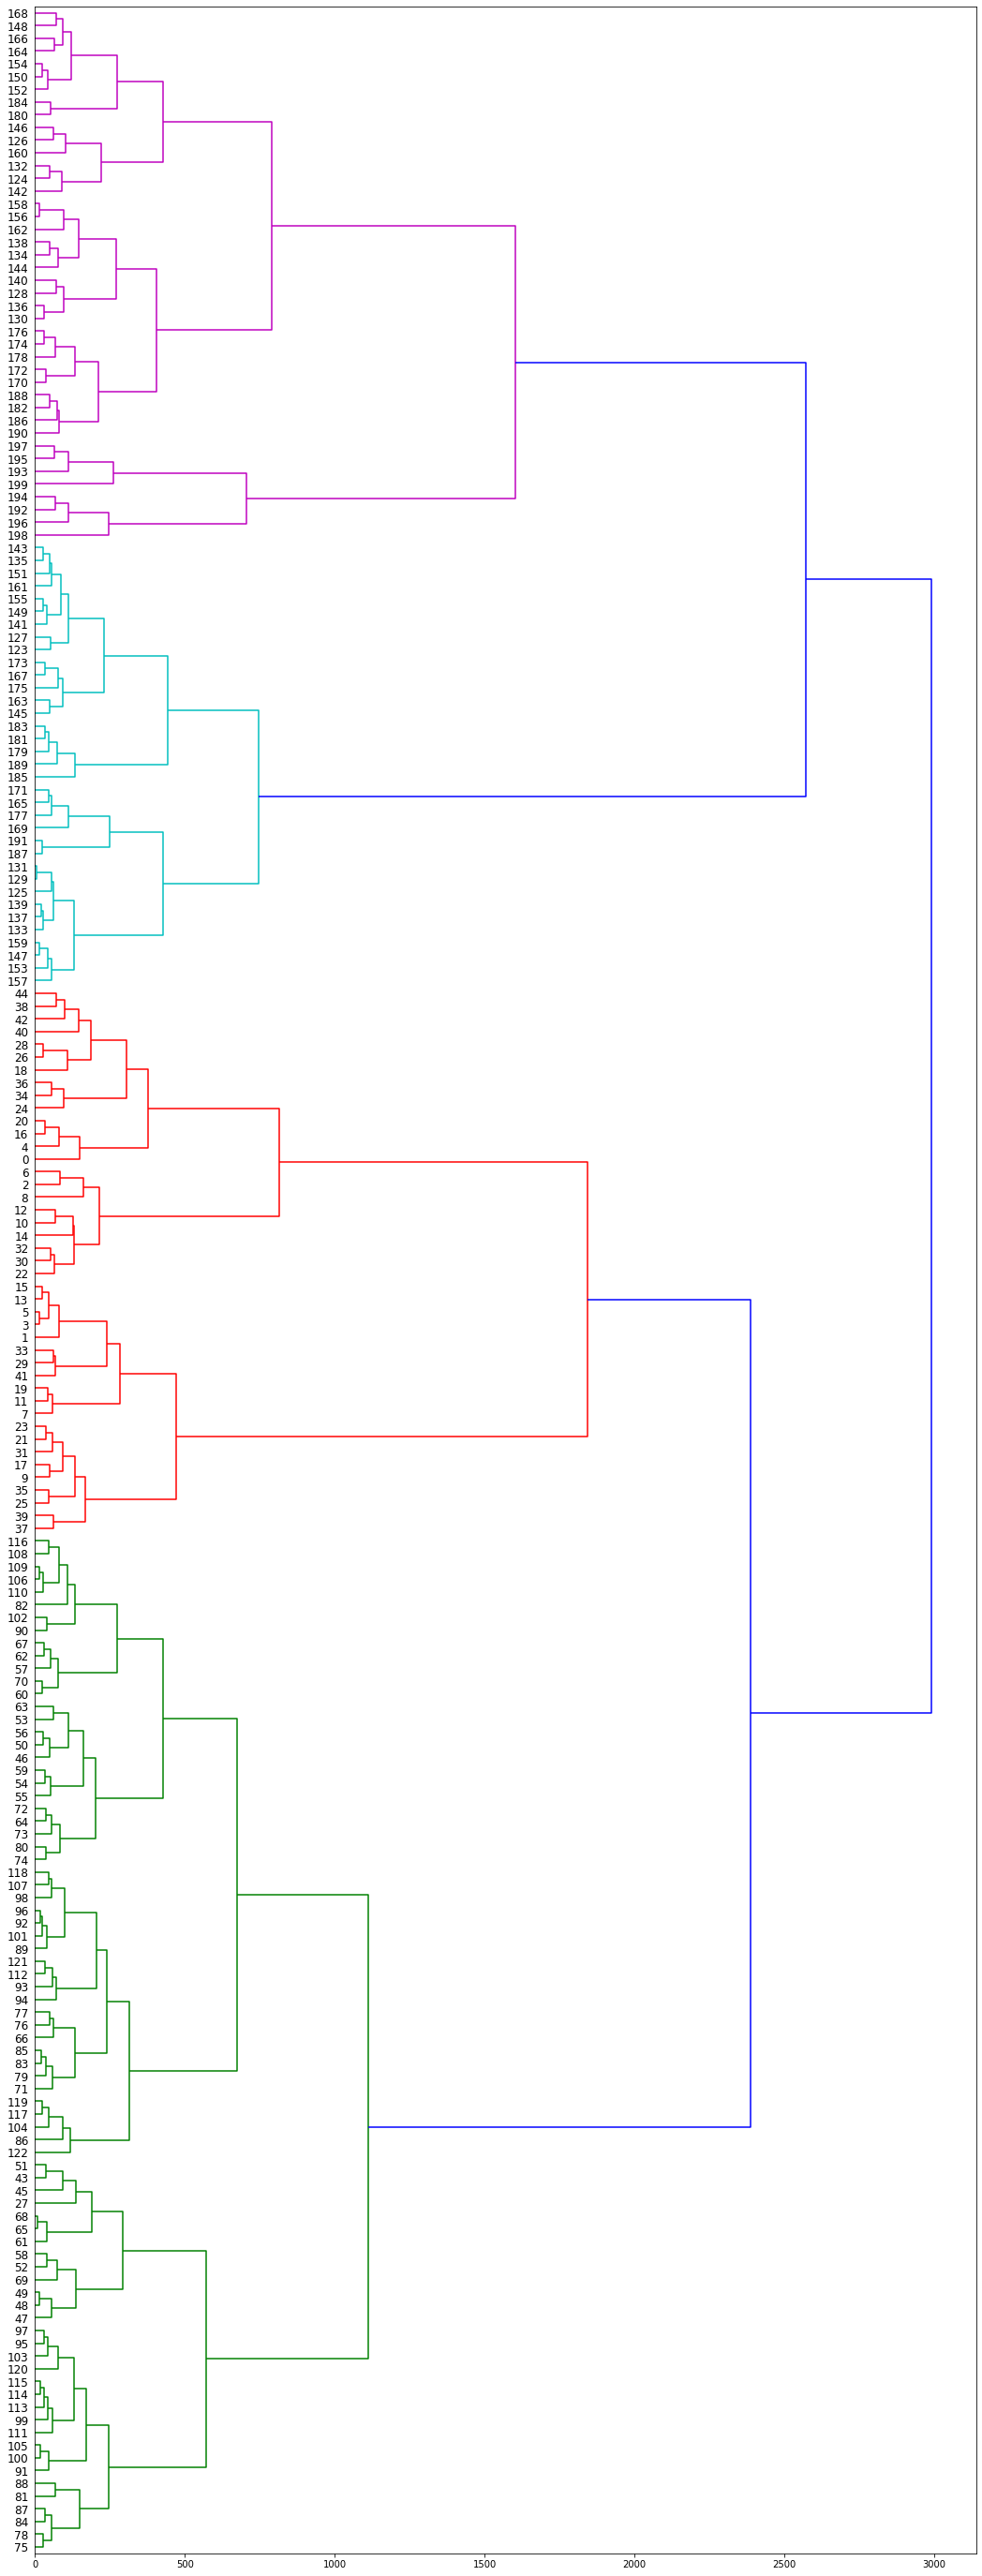

In [24]:
# 계층적 군집 덴드로그램
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
dist = distance_matrix(X, X)
Z = hierarchy.linkage(dist, 'ward')
plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')